In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
S = pd.read_csv('../data/TrueFX/EUR-USD/EURUSD-2018-01.csv', names=['ref','date','bid','ask'], index_col=1,
               infer_datetime_format=True, parse_dates=True)

In [3]:
S = S.drop('ref', axis=1)
S = S.dropna()

In [4]:
S.head()

,bid,ask
date,,
2018-01-01 22:01:01.051,1.20094,1.20116
2018-01-01 22:01:01.158,1.20093,1.20115
2018-01-01 22:01:11.676,1.20093,1.20111
2018-01-01 22:01:18.116,1.20082,1.20111
2018-01-01 22:01:32.023,1.20043,1.20070


In [5]:
S.shape

(3952896, 2)

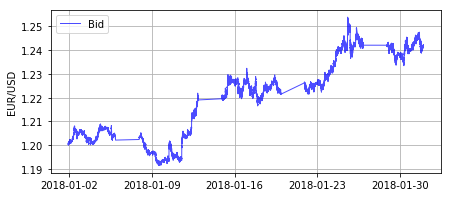

In [6]:
plt.figure(figsize=(7,3))
plt.grid()
plt.ylabel('EUR/USD')
plt.plot(S.index,S.bid,color='blue',alpha=0.7, linewidth=1, label='Bid')
#plt.plot(S.index,S.ask,color='red',alpha=0.7, linewidth=1, label='Ask')
plt.legend();
plt.savefig('figure1-1.png')

In [7]:
S = S.groupby(S.index).first()

In [8]:
S = S.resample('5T',loffset='5T').last().dropna()

In [9]:
S.shape

(6360, 2)

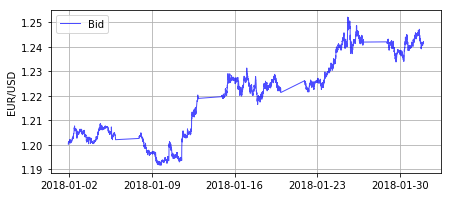

In [19]:
plt.figure(figsize=(7,3))
plt.grid()
plt.ylabel('EUR/USD')
plt.plot(S.index,S.bid,color='blue',alpha=0.7, linewidth=1, label='Bid')
#plt.plot(S.index,S.ask,color='red',alpha=0.7, linewidth=1, label='Ask')
plt.legend();
plt.savefig('figure1-2.png')

In [11]:
S.shape

(6360, 2)

In [12]:
100 - (6360/3952896)*100

99.83910530406062

In [13]:
5*12*24*20

28800

#### Para sacar la figura 2

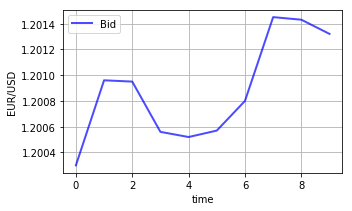

In [22]:
plt.figure(figsize=(5,3))
plt.grid()
plt.ylabel('EUR/USD')
plt.xlabel('time')
plt.plot(range(len(S.index[:10])),S.bid[:10],color='blue',alpha=0.7, linewidth=2, label='Bid')
plt.legend();
plt.savefig('figure2-1.png')

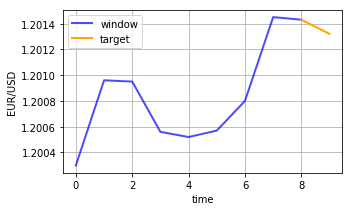

In [61]:
plt.figure(figsize=(5,3))
plt.grid()
plt.ylabel('EUR/USD')
plt.xlabel('time')
plt.plot(range(len(S.index[:9])),S.bid[:9],color='blue',alpha=0.7, linewidth=2, label='window')
plt.plot(range(len(S.index[:10])),list(np.zeros(8)*np.nan) + list([S.bid[8],S.bid[9]]),color='orange',alpha=1, linewidth=2, label='target')
plt.legend();
plt.savefig('figure2-2.png')

In [62]:
x_prom = np.mean(S.bid[:9])

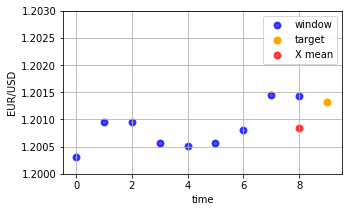

In [92]:
plt.figure(figsize=(5,3))
plt.grid()
plt.ylabel('EUR/USD')
plt.xlabel('time')
plt.scatter(range(len(S.index[:9])),S.bid[:9],color='blue',alpha=0.7, linewidth=2, label='window')
plt.scatter(range(len(S.index[:10])),list(np.zeros(9)*np.nan) + list([S.bid[9]]),
         color='orange',alpha=1, linewidth=2, label='target')

plt.scatter(range(len(S.index[:9])),list(np.zeros(8)*np.nan) + list([x_prom]),
         color='red',alpha=.7, linewidth=2, label='X mean')

plt.ylim(1.2,1.203)
plt.legend();
plt.savefig('figure3-2.png')

#### Para el OHLC

In [112]:
o = 1.2017
h = 1.202
l = 1.2003
c = S.bid[9]

In [113]:
o, h, l, c

(1.2017, 1.202, 1.2003, 1.2013200000000002)

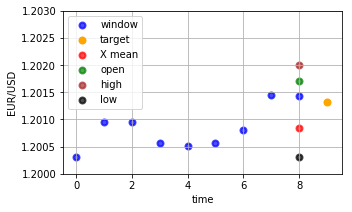

In [116]:
plt.figure(figsize=(5,3))
plt.grid()
plt.ylabel('EUR/USD')
plt.xlabel('time')
plt.scatter(range(len(S.index[:9])),S.bid[:9],color='blue',alpha=0.7, linewidth=2, label='window')
plt.scatter(range(len(S.index[:10])),list(np.zeros(9)*np.nan) + list([S.bid[9]]),
         color='orange',alpha=1, linewidth=2, label='target')

plt.scatter(range(len(S.index[:9])),list(np.zeros(8)*np.nan) + list([x_prom]),
         color='red',alpha=.7, linewidth=2, label='X mean')

plt.scatter(range(len(S.index[:9])),list(np.zeros(8)*np.nan) + list([o]),
         color='green',alpha=.7, linewidth=2, label='open')

plt.scatter(range(len(S.index[:9])),list(np.zeros(8)*np.nan) + list([h]),
         color='brown',alpha=.7, linewidth=2, label='high')

plt.scatter(range(len(S.index[:9])),list(np.zeros(8)*np.nan) + list([l]),
         color='black',alpha=.7, linewidth=2, label='low')

plt.ylim(1.2,1.203)
plt.legend();
plt.savefig('figure3-4.png')